In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

2023-04-12 16:16:11.080810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Getting Pre-Trained and labelled datasets using MNIST

In [2]:
mnist = tf.keras.datasets.mnist #keras is a api which is in tensorflow, mnist is a pretrain data set of digit.

(x_train , y_train) , (x_test , y_test) = mnist.load_data() #load the data mnist, divide into test set or train set

#
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(y_test)



Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)

                                    # Feature scaling the dataset



In [3]:
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)





# Model


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), #flatten layer: convert 2d array in 1D array
    tf.keras.layers.Dense(256 , activation='leaky_relu' , name='lay1'), #Dense layer
    tf.keras.layers.Dense(256, activation='leaky_relu' , name='lay3'), #leaky_relu: activation function
    tf.keras.layers.Dense(64, activation='leaky_relu' , name='lay4'),
    tf.keras.layers.Dense(128 , activation='leaky_relu' , name='lay5'),
    tf.keras.layers.Dense(10 , activation='linear' , name='outputLay')
])

# compile

In [5]:

from keras.losses import SparseCategoricalCrossentropy 
from keras.optimizers import Adam #adam is optimise , it help learing algorithm.inhensing the learing gredent decent
#defining acrhitecuture
model.compile(optimizer = Adam(learning_rate=0.001) , loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# fit data

In [6]:
model.fit(x_train , y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2478 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1140 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0848 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0692 - accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598 - accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0449 - accuracy: 0.9857
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0395 - accuracy: 0.9871
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0370 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.032

# save the model

In [7]:
model.save('Handwritten.model')

INFO:tensorflow:Assets written to: Handwritten.model\assets


# Test the model


In [5]:
hw_model = tf.keras.models.load_model('Handwritten.model') # loading the store the modle

#test
# loss , accuracy = hw_model.evaluate(x_test , y_test)

# print(loss)
# print(accuracy)



# predict : read the every image through openCV from the test-set/imagefolder


1/1 [==============================] - 1s 711ms/step
[[-4586.904    5747.3594    -95.62415 -1343.305     643.64777 -2725.291
  -1643.6283    355.23032  1792.4667   -411.72308]]
(1, 10)
the image is probably 1


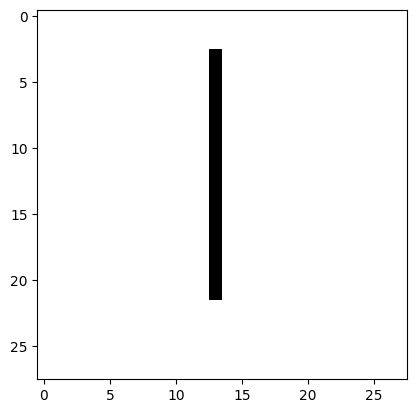

1/1 [==============================] - 0s 81ms/step
[[-2894.7395   1013.11316  3815.359     444.22556 -1302.2206  -1614.8975
  -2250.0166   3776.6628  -1649.9841  -2701.015  ]]
(1, 10)
the image is probably 2


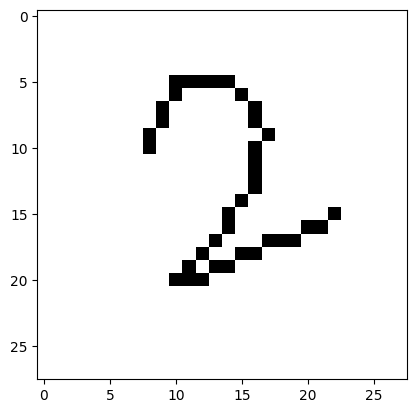

1/1 [==============================] - 0s 83ms/step
[[-3705.3967  -1034.015    -849.1768   5124.3174  -2723.0022   4601.085
  -1669.922     201.55612  -614.36255  -583.5351 ]]
(1, 10)
the image is probably 3


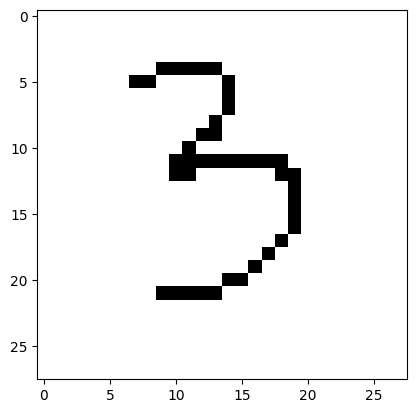

1/1 [==============================] - 0s 78ms/step
[[ -519.2488  -3104.5193  -1506.17     -759.639    3209.6475  -1039.605
    316.08768   327.0093   -127.07514   406.90823]]
(1, 10)
the image is probably 4


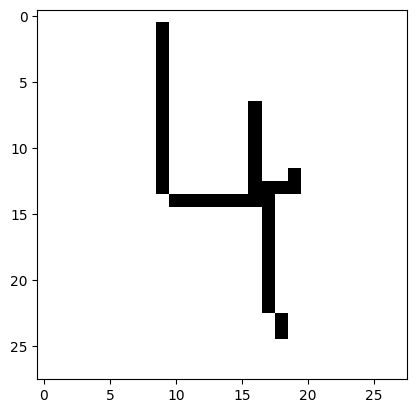

1/1 [==============================] - 0s 69ms/step
[[-1135.1798 -4068.123  -2626.9797   484.5977 -1699.9681  5632.1553
    932.8283 -1562.0648  -687.1332  2258.2917]]
(1, 10)
the image is probably 5


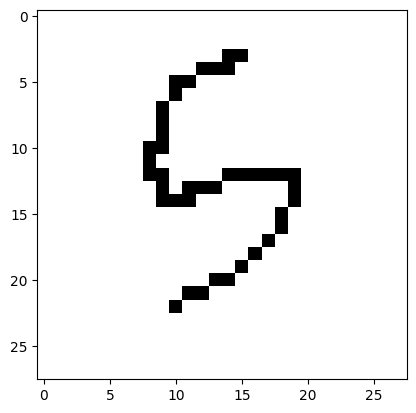

1/1 [==============================] - 0s 71ms/step
[[-3718.6226   2460.8462   2176.7214    342.33493    47.36113 -1877.476
  -3959.7197   5284.43    -2368.4607  -1140.8127 ]]
(1, 10)
the image is probably 7


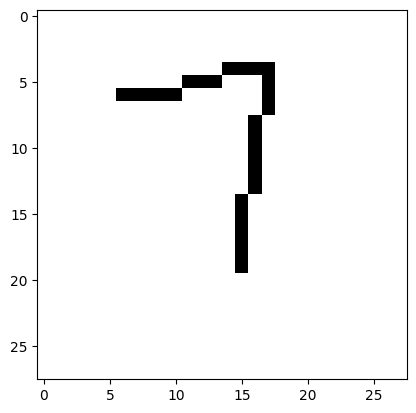

1/1 [==============================] - 0s 64ms/step
[[ 1039.034   -1937.0066    -43.40977   200.43008  -342.27646   151.77182
   2859.1675  -3420.1875   -955.7008   -752.99725]]
(1, 10)
the image is probably 6


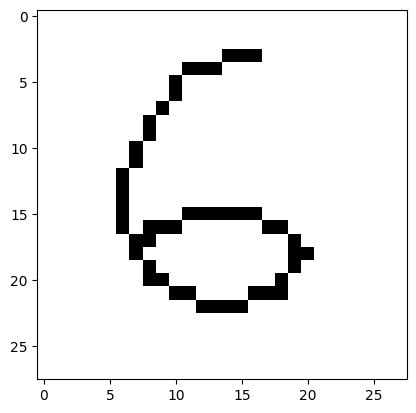

1/1 [==============================] - 0s 72ms/step
[[ -600.5813   -2027.5248   -1563.7185    2407.6704   -1647.436
    811.2072     306.25568    -47.424248  1082.6194    -501.33206 ]]
(1, 10)
the image is probably 3


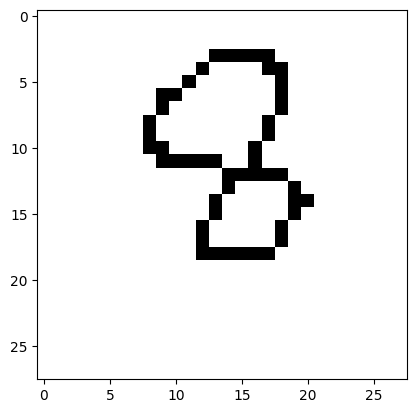

1/1 [==============================] - 0s 68ms/step
[[-2971.491     -784.1285    -278.85907   1514.1743    1397.7148
  -2272.3105   -2086.3088     -13.645463  2378.7776    -868.46295 ]]
(1, 10)
the image is probably 8


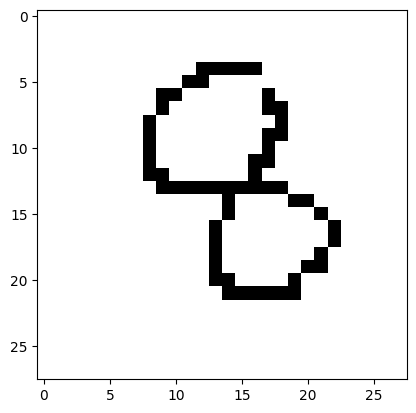

1/1 [==============================] - 0s 87ms/step
[[-1930.4507   -918.04486  -120.41093  5200.5464  -1078.7291    509.7045
  -3068.2634   -452.66434   470.72644   463.34482]]
(1, 10)
the image is probably 3


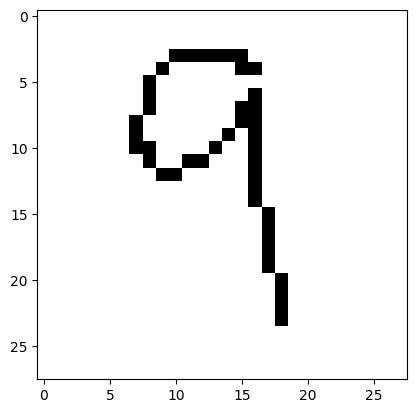

1/1 [==============================] - 0s 86ms/step
[[-1812.6862   920.4123  1050.4534 -2570.5403 -1717.0042   528.0484
   4813.666  -3698.481   1304.6884 -2024.8218]]
(1, 10)
the image is probably 6


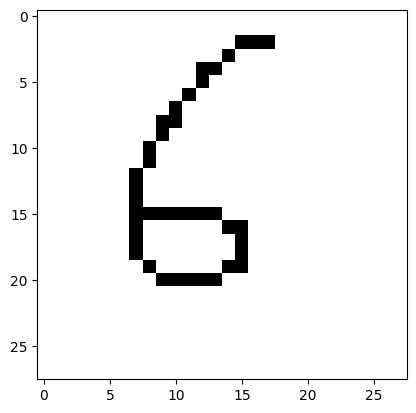

1/1 [==============================] - 0s 76ms/step
[[ 2251.0889  -1458.5482   1390.24     -748.80853  -174.81862 -1649.304
  -1553.3169    560.20795  -998.0653    314.14432]]
(1, 10)
the image is probably 0


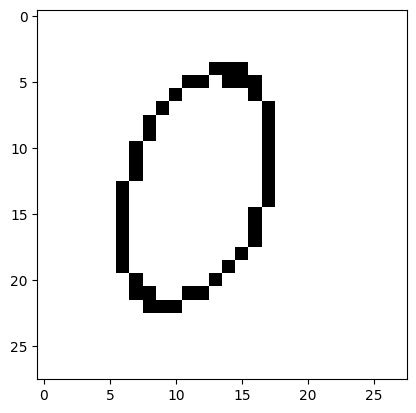

In [6]:
# predict : read the every image through openCV from the test-set/imagefolder
for x in range(0,12):
    img = cv2.imread(f'digits/digit{x}.png')[:,:,0]
    
    img = np.invert(np.array([img]))
    
    prediction = hw_model.predict(img)
    print(prediction)
    true_prediction = tf.nn.softmax(prediction)
    print(np.shape(true_prediction))
    print(f'the image is probably {np.argmax(true_prediction)}')
    plt.imshow(img[0] , cmap=plt.cm.binary)
    plt.show()
